# Data Analysis Script
##### Hasso-Plattner Institute - HPI | University of Potsdam, Germany
##### Work completed by Alisher Turubayev (Fabian Stolp, PhD supervisor)

This notebook contains all code that was used to generate figures/tables for the thesis submission. Original data is available in the `replication_data` folder,

## Data exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import mne

### Task 1
Task: calculate mean/std time per task to present in the paper

In [40]:
PARTICIPANTS = ['S01', 'S03', 'S04', 'S05', 'S07', 'S08', 'S09', 'S10', 'S11', 
    'S12', 'S13', 'S14', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 
    'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30']
# File associations
FILE_SUFFIXES = {
    'task1': 'R01_an_ev.txt', 
    'task2': 'R02_an_ev.txt', 
    'task3': 'R03_an_ev.txt'
}
FILES_PATH = './replication_data/event_data'

In [41]:
task1_durations = []
task2_durations = []
task3_durations = []

# Load events, extract latency for end of task and beginning of task, and note the difference
for participant_name in PARTICIPANTS:
    task1_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task1']))
    task2_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task2']))
    task3_path = os.path.join(FILES_PATH, (participant_name + FILE_SUFFIXES['task3']))
    
    if os.path.isfile(task1_path) == False or os.path.isfile(task2_path) == False or os.path.isfile(task3_path) == False:
        print(f'  A file for participant {participant_name} was not found. Continuing...')
        continue
    df = pd.read_table(task1_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task1_durations.append(time_end - time_start)
    
    df = pd.read_table(task2_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task2_durations.append(time_end - time_start)

    df = pd.read_table(task3_path, sep = ',', header = 0, index_col = None)
    time_start = df.iloc[3]['latency']
    time_end = df.iloc[4]['latency']
    task3_durations.append(time_end - time_start)

  A file for participant S09 was not found. Continuing...
  A file for participant S10 was not found. Continuing...
  A file for participant S11 was not found. Continuing...
  A file for participant S12 was not found. Continuing...
  A file for participant S13 was not found. Continuing...
  A file for participant S14 was not found. Continuing...


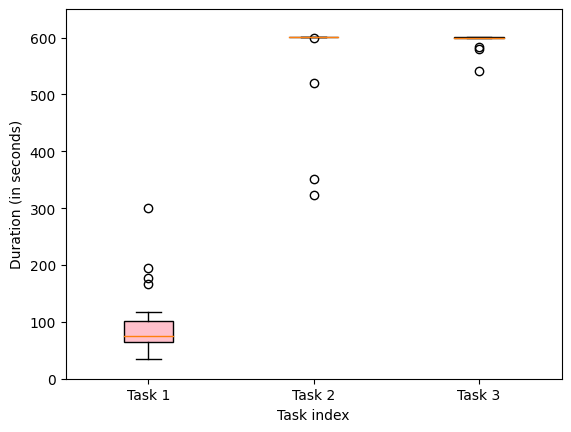

In [43]:
bplot = plt.boxplot([task1_durations, task2_durations, task3_durations], vert = True, patch_artist = True, labels = ['Task 1', 'Task 2', 'Task 3'])
plt.ylim(0, 650)
plt.ylabel('Duration (in seconds)')
plt.xlabel('Task index')
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [58]:
# Transform data to dataframe for .describe() summary
df = pd.DataFrame.from_dict({
    'Task 1': task1_durations, 
    'Task 2': task2_durations,
    'Task 3': task3_durations
})

In [59]:
df

,Task 1,Task 2,Task 3
0,166.363,600.051,600.086
1,66.454,600.098,600.090
2,194.447,600.103,600.099
3,33.905,519.548,583.018
4,117.304,600.103,600.102
5,64.650,600.103,600.055
6,177.047,600.099,600.103
7,75.502,600.115,600.071
8,71.747,600.116,600.091
9,93.824,600.116,600.119


In [60]:
df.describe(percentiles = [])

,Task 1,Task 2,Task 3
count,21.000000,21.000000,21.000000
mean,98.884571,571.292238,595.514524
std,62.881100,79.690108,13.542326
min,33.905000,323.820000,541.921000
50%,75.502000,600.103000,600.086000
max,300.071000,600.119000,600.119000


In [67]:
df.median(axis = 0)

Task 1     75.502
Task 2    600.103
Task 3    600.086
dtype: float64

In [41]:
print('Task 1 duration mean: {:.2f} std: {:.2f}'.format(98.884571, 62.881100))
print('Task 2 duration mean: {:.2f} std: {:.2f}'.format(571.292238, 79.690108))
print('Task 3 duration mean: {:.2f} std: {:.2f}'.format(595.514524, 13.542326))

Task 1 duration mean: 98.88 std: 62.88
Task 2 duration mean: 571.29 std: 79.69
Task 3 duration mean: 595.51 std: 13.54


### Task 2

Generate NASA-TLX boxplot like in Medeiros et al. (2021)

In [35]:
# Values from BASE_Study0 - Evaluation_NASA_TLX / Effort felt / Mental Effort column (G, AK, BO)
tlx_task1 = [2,1,2,2,1,2,4,2,1,2,2,2,2,2,2,1,1,2,2,3,2,2,1,2,1,2,1,1,2]
tlx_task2 = [5,5,4,6,3,5,5,3,6,4,5,4,6,5,4,3,3,6,5,4,4,6,4,6,4,4,6,5,5]
tlx_task3 = [5,5,3,5,4,6,4,3,5,5,5,6,6,6,5,4,4,6,4,6,5,5,4,6,3,5,6,3,6]

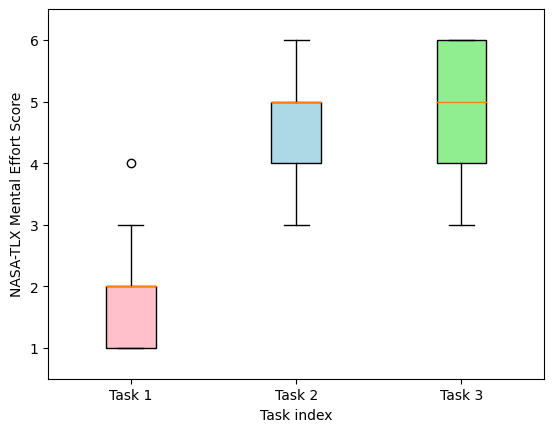

In [39]:
bplot = plt.boxplot([tlx_task1, tlx_task2, tlx_task3], vert = True, patch_artist = True, labels = ['Task 1', 'Task 2', 'Task 3'])
plt.ylim(0.5, 6.5)
plt.ylabel('NASA-TLX Mental Effort Score')
plt.xlabel('Task index')
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [9]:
print('mean of task 1: {:.2f}, std: {:.2f}'.format(np.mean(tlx_task1), np.std(tlx_task1)))
print('mean of task 2: {:.2f}, std: {:.2f}'.format(np.mean(tlx_task2), np.std(tlx_task2)))
print('mean of task 3: {:.2f}, std: {:.2f}'.format(np.mean(tlx_task3), np.std(tlx_task3)))

mean of task 1: 1.79, std: 0.66
mean of task 2: 4.66, std: 0.99
mean of task 3: 4.83, std: 1.02


### Task 3 

Collating results for the final presentation

In [2]:
FILE_PATH = './replication_data/run_results.csv'
df_res = pd.read_csv(FILE_PATH)

In [3]:
df_res

,Name,mean_fold_acc,multiclass_strategy,pca_cev,svm_C,svm_max_iter,xgb_n_estimators,xgb_max_depth
0,eager-sweep-120,0.840518,native,0.95,NaN,NaN,300.0,10.0
1,autumn-sweep-119,0.840518,native,0.95,NaN,NaN,200.0,10.0
2,leafy-sweep-118,0.838130,native,0.95,NaN,NaN,100.0,10.0
3,vague-sweep-117,0.843486,native,0.95,NaN,NaN,300.0,8.0
4,chocolate-sweep-116,0.843486,native,0.95,NaN,NaN,200.0,8.0
...,...,...,...,...,...,...,...,...
275,generous-sweep-5,0.816076,oao,0.70,0.015625,1000.0,NaN,NaN
276,dulcet-sweep-4,0.824372,oao,0.70,0.003906,2000.0,NaN,NaN
277,sandy-sweep-3,0.824363,oao,0.70,0.003906,1000.0,NaN,NaN
278,balmy-sweep-2,0.827928,oao,0.70,0.000977,2000.0,NaN,NaN


#### SVM

##### SVM - PCA CEV

In [25]:
# SVM - PCA CEV
acc_pca7 = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['pca_cev'] == 0.7)]
acc_pca7 = acc_pca7['mean_fold_acc']

acc_pca8 = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['pca_cev'] == 0.80)]
acc_pca8 = acc_pca8['mean_fold_acc']

acc_pca85 = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['pca_cev'] == 0.85)]
acc_pca85 = acc_pca85['mean_fold_acc']

acc_pca9 = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['pca_cev'] == 0.90)]
acc_pca9 = acc_pca9['mean_fold_acc']

acc_pca95 = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['pca_cev'] == 0.95)]
acc_pca95 = acc_pca95['mean_fold_acc']

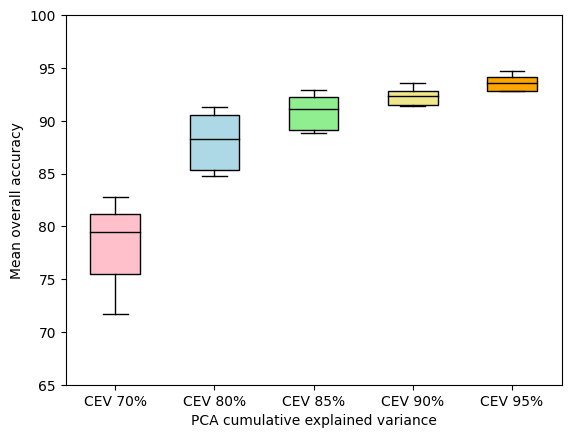

In [26]:
bplot = plt.boxplot([acc_pca7 * 100, acc_pca8 * 100, acc_pca85 * 100, acc_pca9 * 100, acc_pca95 * 100], vert = True, patch_artist = True, labels = ['CEV 70%', 'CEV 80%', 'CEV 85%', 'CEV 90%', 'CEV 95%'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('PCA cumulative explained variance')
colors = ['pink', 'lightblue', 'lightgreen', 'khaki', 'orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [34]:
print('SVM mean of CEV 70%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca7 * 100), np.std(acc_pca7 * 100)))
print('SVM mean of CEV 80%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca8 * 100), np.std(acc_pca8 * 100)))
print('SVM mean of CEV 85%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca85 * 100), np.std(acc_pca85 * 100)))
print('SVM mean of CEV 90%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca9 * 100), np.std(acc_pca9 * 100)))
print('SVM mean of CEV 95%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca95 * 100), np.std(acc_pca95 * 100)))

SVM mean of CEV 70%: 78.36, std: 3.39
SVM mean of CEV 80%: 88.07, std: 2.69
SVM mean of CEV 85%: 90.81, std: 1.66
SVM mean of CEV 90%: 92.28, std: 0.71
SVM mean of CEV 95%: 93.55, std: 0.66


##### SVM - OAO/OAA

In [11]:
# SVM - OAO/OAA
acc_oao = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['multiclass_strategy'] == 'oao')]
acc_oao = acc_oao['mean_fold_acc']

acc_oaa = df_res.loc[(np.isnan(df_res['svm_C']) == False) & (df_res['multiclass_strategy'] == 'oaa')]
acc_oaa = acc_oaa['mean_fold_acc']

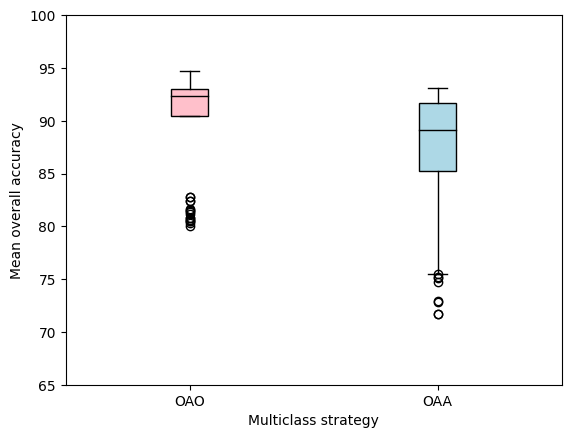

In [12]:
bplot = plt.boxplot([acc_oao * 100, acc_oaa * 100], vert = True, patch_artist = True, labels = ['OAO', 'OAA'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('Multiclass strategy')
colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [38]:
print('SVM mean of OAO: {:.2f}, std: {:.2f}'.format(np.mean(acc_oao * 100), np.std(acc_oao * 100)))
print('SVM mean of OAA: {:.2f}, std: {:.2f}'.format(np.mean(acc_oaa * 100), np.std(acc_oaa * 100)))

SVM mean of OAO: 90.33, std: 4.66
SVM mean of OAA: 86.90, std: 6.37


##### SVM - C

In [4]:
# SVM - C
acc_c210 = df_res.loc[df_res['svm_C'] == 0.0009765625]
acc_c210 = acc_c210['mean_fold_acc']

acc_c28 = df_res.loc[df_res['svm_C'] == 0.00390625]
acc_c28 = acc_c28['mean_fold_acc']

acc_c26 = df_res.loc[df_res['svm_C'] == 0.015625]
acc_c26 = acc_c26['mean_fold_acc']

acc_c24 = df_res.loc[df_res['svm_C'] == 0.062500]
acc_c24 = acc_c24['mean_fold_acc']

acc_c22 = df_res.loc[df_res['svm_C'] == 0.250000]
acc_c22 = acc_c22['mean_fold_acc']

acc_c1 = df_res.loc[df_res['svm_C'] == 1.000000]
acc_c1 = acc_c1['mean_fold_acc']

acc_c4 = df_res.loc[df_res['svm_C'] == 4.000000]
acc_c4 = acc_c4['mean_fold_acc']

acc_c16 = df_res.loc[df_res['svm_C'] == 16.000000]
acc_c16 = acc_c16['mean_fold_acc']

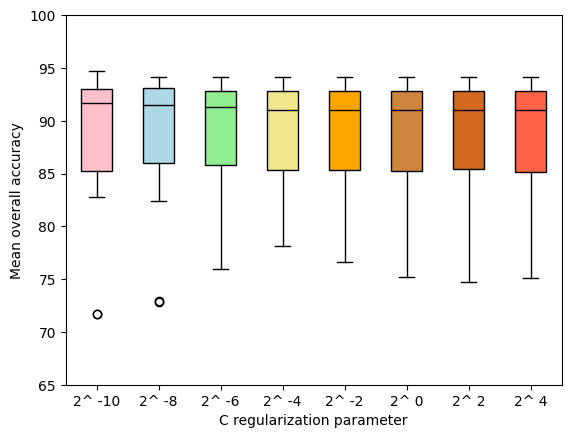

In [6]:
bplot = plt.boxplot([acc_c210 * 100, acc_c28 * 100, acc_c26 * 100, acc_c24 * 100, acc_c22 * 100, acc_c1 * 100, acc_c4 * 100, acc_c16 * 100], vert = True, patch_artist = True, labels = ['2^ -10', '2^ -8', '2^ -6', '2^ -4', '2^ -2', '2^ 0', '2^ 2', '2^ 4'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('C regularization parameter')
colors = ['pink', 'lightblue', 'lightgreen', 'khaki', 'orange', 'peru', 'chocolate', 'tomato']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [71]:
print('SVM mean of C 2^-10: {:.2f}, std: {:.2f}'.format(np.mean(acc_c210 * 100), np.std(acc_c210 * 100)))
print('SVM mean of C 2^-8: {:.2f}, std: {:.2f}'.format(np.mean(acc_c28 * 100), np.std(acc_c28 * 100)))
print('SVM mean of C 2^-6: {:.2f}, std: {:.2f}'.format(np.mean(acc_c26 * 100), np.std(acc_c26 * 100)))
print('SVM mean of C 2^-4: {:.2f}, std: {:.2f}'.format(np.mean(acc_c24 * 100), np.std(acc_c24 * 100)))
print('SVM mean of C 2^-2: {:.2f}, std: {:.2f}'.format(np.mean(acc_c22 * 100), np.std(acc_c22 * 100)))
print('SVM mean of C 2^0: {:.2f}, std: {:.2f}'.format(np.mean(acc_c1 * 100), np.std(acc_c1 * 100)))
print('SVM mean of C 2^2: {:.2f}, std: {:.2f}'.format(np.mean(acc_c4 * 100), np.std(acc_c4 * 100)))
print('SVM mean of C 2^4: {:.2f}, std: {:.2f}'.format(np.mean(acc_c16 * 100), np.std(acc_c16 * 100)))

SVM mean of C 2^-10: 88.63, std: 6.70
SVM mean of C 2^-8: 88.75, std: 6.32
SVM mean of C 2^-6: 88.81, std: 5.56
SVM mean of C 2^-4: 88.82, std: 5.11
SVM mean of C 2^-2: 88.72, std: 5.25
SVM mean of C 2^0: 88.39, std: 5.87
SVM mean of C 2^2: 88.39, std: 5.90
SVM mean of C 2^4: 88.41, std: 5.82


##### SVM - Iters

In [13]:
# SVM - C
acc_iters1 = df_res.loc[df_res['svm_max_iter'] == 1000]
acc_iters1 = acc_iters1['mean_fold_acc']

acc_iters2 = df_res.loc[df_res['svm_max_iter'] == 2000]
acc_iters2 = acc_iters2['mean_fold_acc']

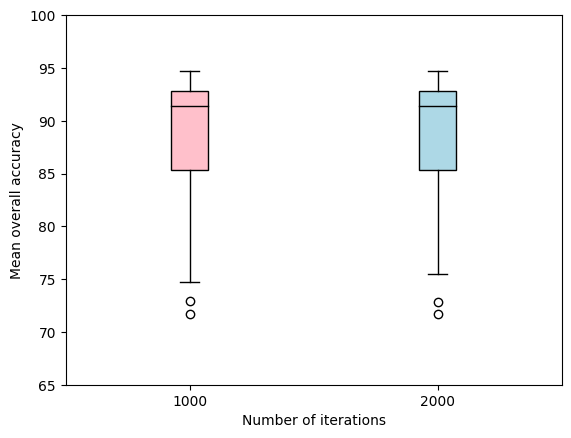

In [14]:
bplot = plt.boxplot([acc_iters1 * 100, acc_iters2 * 100], vert = True, patch_artist = True, labels = ['1000', '2000'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('Number of iterations')
colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [74]:
print('SVM mean of max iter 1000: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters1 * 100), np.std(acc_iters1 * 100)))
print('SVM mean of max iter 2000: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters2 * 100), np.std(acc_iters2 * 100)))

SVM mean of max iter 1000: 88.59, std: 5.89
SVM mean of max iter 2000: 88.64, std: 5.78


#### XGBoost

##### XGBoost - PCA CEV

In [27]:
# XGBoost - PCA CEV
acc_pca7 = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['pca_cev'] == 0.7)]
acc_pca7 = acc_pca7['mean_fold_acc']

acc_pca8 = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['pca_cev'] == 0.80)]
acc_pca8 = acc_pca8['mean_fold_acc']

acc_pca85 = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['pca_cev'] == 0.85)]
acc_pca85 = acc_pca85['mean_fold_acc']

acc_pca9 = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['pca_cev'] == 0.90)]
acc_pca9 = acc_pca9['mean_fold_acc']

acc_pca95 = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['pca_cev'] == 0.95)]
acc_pca95 = acc_pca95['mean_fold_acc']

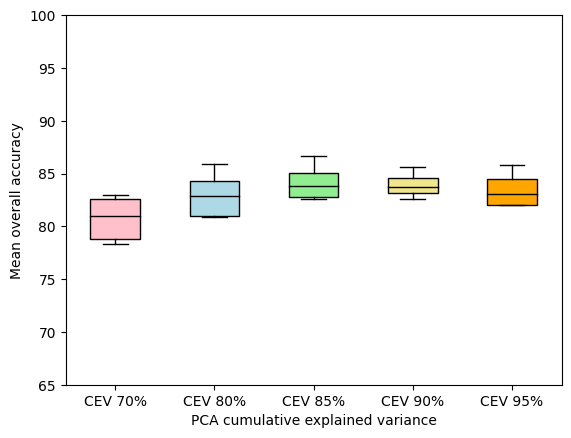

In [28]:
bplot = plt.boxplot([acc_pca7 * 100, acc_pca8 * 100, acc_pca85 * 100, acc_pca9 * 100, acc_pca95 * 100], vert = True, patch_artist = True, labels = ['CEV 70%', 'CEV 80%', 'CEV 85%', 'CEV 90%', 'CEV 95%'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('PCA cumulative explained variance')
colors = ['pink', 'lightblue', 'lightgreen', 'khaki', 'orange']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [77]:
print('XGB mean of CEV 70%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca7 * 100), np.std(acc_pca7 * 100)))
print('XGB mean of CEV 80%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca8 * 100), np.std(acc_pca8 * 100)))
print('XGB mean of CEV 85%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca85 * 100), np.std(acc_pca85 * 100)))
print('XGB mean of CEV 90%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca9 * 100), np.std(acc_pca9 * 100)))
print('XGB mean of CEV 95%: {:.2f}, std: {:.2f}'.format(np.mean(acc_pca95 * 100), np.std(acc_pca95 * 100)))

XGB mean of CEV 70%: 80.71, std: 1.87
XGB mean of CEV 80%: 82.81, std: 1.72
XGB mean of CEV 85%: 84.05, std: 1.30
XGB mean of CEV 90%: 83.89, std: 0.97
XGB mean of CEV 95%: 83.37, std: 1.37


##### XGBoost - Native/OAO

In [18]:
# XGBoost - Native/OAA
acc_oao = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['multiclass_strategy'] == 'oao')]
acc_oao = acc_oao['mean_fold_acc']

acc_oaa = df_res.loc[(np.isnan(df_res['xgb_n_estimators']) == False) & (df_res['multiclass_strategy'] == 'native')]
acc_oaa = acc_oaa['mean_fold_acc']

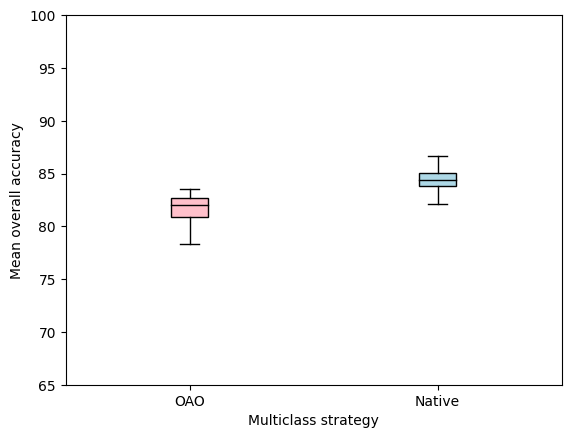

In [19]:
bplot = plt.boxplot([acc_oao * 100, acc_oaa * 100], vert = True, patch_artist = True, labels = ['OAO', 'Native'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('Multiclass strategy')
colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [84]:
print('XGB mean of OAO: {:.2f}, std: {:.2f}'.format(np.mean(acc_oao * 100), np.std(acc_oao * 100)))
print('XGB mean of Native: {:.2f}, std: {:.2f}'.format(np.mean(acc_oaa * 100), np.std(acc_oaa * 100)))

XGB mean of OAO: 81.61, std: 1.55
XGB mean of Native: 84.32, std: 1.10


##### XGBoost - num estim

In [29]:
# XGBoost - num estim
acc_c210 = df_res.loc[df_res['xgb_n_estimators'] == 100.0]
acc_c210 = acc_c210['mean_fold_acc']

acc_c28 = df_res.loc[df_res['xgb_n_estimators'] == 200.0]
acc_c28 = acc_c28['mean_fold_acc']

acc_c26 = df_res.loc[df_res['xgb_n_estimators'] == 300.0]
acc_c26 = acc_c26['mean_fold_acc']

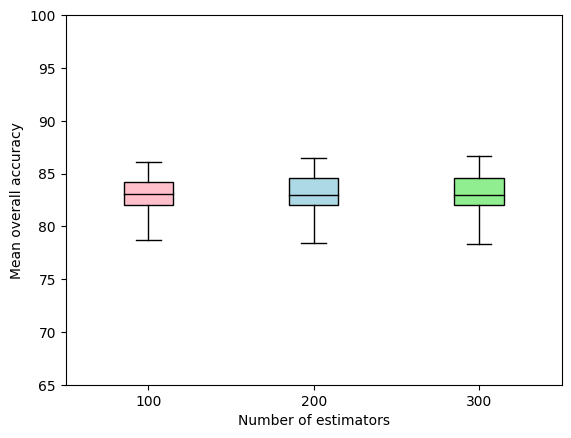

In [31]:
bplot = plt.boxplot([acc_c210 * 100, acc_c28 * 100, acc_c26 * 100], vert = True, patch_artist = True, labels = ['100', '200', '300'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('Number of estimators')
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [87]:
print('XGB mean of n est 100: {:.2f}, std: {:.2f}'.format(np.mean(acc_c210 * 100), np.std(acc_c210 * 100)))
print('XGB mean of n est 200: {:.2f}, std: {:.2f}'.format(np.mean(acc_c28 * 100), np.std(acc_c28 * 100)))
print('XGB mean of n est 300: {:.2f}, std: {:.2f}'.format(np.mean(acc_c26 * 100), np.std(acc_c26 * 100)))

XGB mean of n est 100: 82.89, std: 1.79
XGB mean of n est 200: 83.00, std: 1.95
XGB mean of n est 300: 83.01, std: 1.98


##### XGBoost - Max Depth

In [32]:
# XGBoost - Max Depth
acc_iters3 = df_res.loc[df_res['xgb_max_depth'] == 3]
acc_iters3 = acc_iters3['mean_fold_acc']

acc_iters6 = df_res.loc[df_res['xgb_max_depth'] == 6]
acc_iters6 = acc_iters6['mean_fold_acc']

acc_iters8 = df_res.loc[df_res['xgb_max_depth'] == 8]
acc_iters8 = acc_iters8['mean_fold_acc']

acc_iters10 = df_res.loc[df_res['xgb_max_depth'] == 10]
acc_iters10 = acc_iters10['mean_fold_acc']

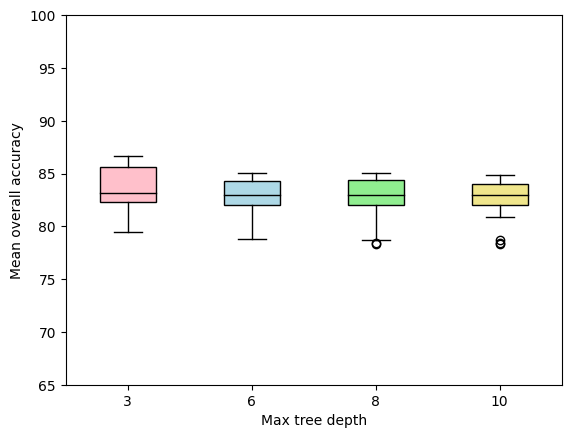

In [33]:
bplot = plt.boxplot([acc_iters3 * 100, acc_iters6 * 100, acc_iters8 * 100, acc_iters10 * 100], vert = True, patch_artist = True, labels = ['3', '6', '8', '10'])
plt.ylim(65, 100)
plt.ylabel('Mean overall accuracy')
plt.xlabel('Max tree depth')
colors = ['pink', 'lightblue', 'lightgreen', 'khaki']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')

In [90]:
print('XGB mean of depth 3: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters3 * 100), np.std(acc_iters3 * 100)))
print('XGB mean of depth 6: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters6 * 100), np.std(acc_iters6 * 100)))
print('XGB mean of depth 8: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters8 * 100), np.std(acc_iters8 * 100)))
print('XGB mean of depth 10: {:.2f}, std: {:.2f}'.format(np.mean(acc_iters10 * 100), np.std(acc_iters10 * 100)))

XGB mean of depth 3: 83.61, std: 2.05
XGB mean of depth 6: 82.82, std: 1.78
XGB mean of depth 8: 82.76, std: 1.85
XGB mean of depth 10: 82.67, std: 1.79


### Task 4

#### Frequency Filtering Image

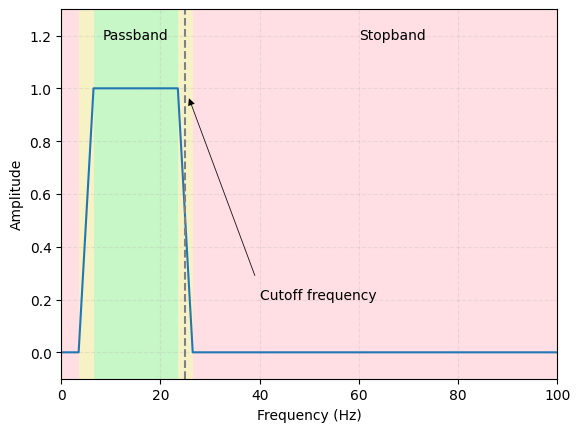

In [89]:
x = [0, 3.5, 6.5, 23.5, 26.5, 100]
y = [0, 0, 1, 1, 0, 0]

plt.plot(x, y)
plt.xlim(0,100)
plt.ylim(-0.1,1.3)

plt.axvspan(0, 3.5, facecolor = 'pink', alpha=0.5)
plt.axvspan(3.5, 6.5, facecolor = 'khaki', alpha=0.5)
plt.axvspan(6.5, 23.5, facecolor = 'lightgreen', alpha = 0.5)
plt.axvspan(23.5, 26.5, facecolor = 'khaki', alpha=0.5)
plt.axvspan(26.5, 100, facecolor = 'pink', alpha=0.5)

plt.annotate('Cutoff frequency', xy=(25,1), xytext=(40, 0.2), arrowprops = dict(facecolor='black', width=0.5,linewidth=0.05, headlength=5, headwidth=5, shrink=0.05))
plt.annotate('Passband', xy=(8.4,1.185))
plt.annotate('Stopband', xy=(60,1.185))
plt.axvline(x=25, color='grey', linestyle='dashed')

plt.grid(visible=True,axis='both',alpha=0.25,linestyle='dashed')

plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()